In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [4]:
#зчитуємо дані з файлів
dataTrain = pd.read_csv('application_train.csv')
dataTest = pd.read_csv('application_test.csv')

In [5]:
# виведення розміру таблиць файлів
print(dataTrain.shape)
print(dataTest.shape)


(307511, 122)
(48744, 121)


In [6]:
# Бачимо різницю в одну колонку. Виводимо ознаку
for col in dataTrain.columns:
  if col not in dataTest.columns:
    print(col)
    break

TARGET


In [7]:
# Виведення NaN значень
nullTrain = dataTrain.isnull().sum()
print(nullTrain.to_string())

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [8]:
nullTest = dataTest.isnull().sum()
print(nullTest.to_string())

SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        24
AMT_GOODS_PRICE                     0
NAME_TYPE_SUITE                   911
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                     32312
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL  

In [9]:
#  Виведення відношення значень NaN до відомих даних
overall_amount_train = dataTrain.shape[0]
nullTrainCorrelation = nullTrain / overall_amount_train
print(nullTrainCorrelation.sort_values(ascending=False).to_string())

COMMONAREA_MEDI                 0.698723
COMMONAREA_AVG                  0.698723
COMMONAREA_MODE                 0.698723
NONLIVINGAPARTMENTS_MODE        0.694330
NONLIVINGAPARTMENTS_AVG         0.694330
NONLIVINGAPARTMENTS_MEDI        0.694330
FONDKAPREMONT_MODE              0.683862
LIVINGAPARTMENTS_MODE           0.683550
LIVINGAPARTMENTS_AVG            0.683550
LIVINGAPARTMENTS_MEDI           0.683550
FLOORSMIN_AVG                   0.678486
FLOORSMIN_MODE                  0.678486
FLOORSMIN_MEDI                  0.678486
YEARS_BUILD_MEDI                0.664978
YEARS_BUILD_MODE                0.664978
YEARS_BUILD_AVG                 0.664978
OWN_CAR_AGE                     0.659908
LANDAREA_MEDI                   0.593767
LANDAREA_MODE                   0.593767
LANDAREA_AVG                    0.593767
BASEMENTAREA_MEDI               0.585160
BASEMENTAREA_AVG                0.585160
BASEMENTAREA_MODE               0.585160
EXT_SOURCE_1                    0.563811
NONLIVINGAREA_MO

In [10]:
overall_amount_test = dataTest.shape[0]
nullTestCorrelation = nullTest / overall_amount_test
print(nullTestCorrelation.sort_values(ascending=False).to_string())

COMMONAREA_AVG                  0.687161
COMMONAREA_MODE                 0.687161
COMMONAREA_MEDI                 0.687161
NONLIVINGAPARTMENTS_AVG         0.684125
NONLIVINGAPARTMENTS_MODE        0.684125
NONLIVINGAPARTMENTS_MEDI        0.684125
FONDKAPREMONT_MODE              0.672842
LIVINGAPARTMENTS_AVG            0.672493
LIVINGAPARTMENTS_MODE           0.672493
LIVINGAPARTMENTS_MEDI           0.672493
FLOORSMIN_MEDI                  0.666051
FLOORSMIN_AVG                   0.666051
FLOORSMIN_MODE                  0.666051
OWN_CAR_AGE                     0.662892
YEARS_BUILD_AVG                 0.652757
YEARS_BUILD_MEDI                0.652757
YEARS_BUILD_MODE                0.652757
LANDAREA_MEDI                   0.579641
LANDAREA_AVG                    0.579641
LANDAREA_MODE                   0.579641
BASEMENTAREA_MEDI               0.567065
BASEMENTAREA_AVG                0.567065
BASEMENTAREA_MODE               0.567065
NONLIVINGAREA_AVG               0.535122
NONLIVINGAREA_MO

In [11]:
# Позбавлення фіч що мають більше n пропущених значень
n = 0.5
for col in dataTrain.columns:
  if col == 'TARGET':
    continue
  if dataTrain[col].isnull().sum() / overall_amount_train > n and dataTest[col].isnull().sum() / overall_amount_test > n:
    dataTrain.drop(columns=col, inplace = True)
    dataTest.drop(columns=col, inplace = True)


In [12]:
# Перевірка наявних NaN
nullTrain = dataTrain.isnull().sum() / overall_amount_train
print(nullTrain.sort_values(ascending=False).to_string())

EXT_SOURCE_1                    0.563811
WALLSMATERIAL_MODE              0.508408
APARTMENTS_AVG                  0.507497
APARTMENTS_MODE                 0.507497
APARTMENTS_MEDI                 0.507497
ENTRANCES_AVG                   0.503488
ENTRANCES_MODE                  0.503488
ENTRANCES_MEDI                  0.503488
LIVINGAREA_MODE                 0.501933
LIVINGAREA_MEDI                 0.501933
LIVINGAREA_AVG                  0.501933
HOUSETYPE_MODE                  0.501761
FLOORSMAX_MODE                  0.497608
FLOORSMAX_AVG                   0.497608
FLOORSMAX_MEDI                  0.497608
YEARS_BEGINEXPLUATATION_MEDI    0.487810
YEARS_BEGINEXPLUATATION_MODE    0.487810
YEARS_BEGINEXPLUATATION_AVG     0.487810
TOTALAREA_MODE                  0.482685
EMERGENCYSTATE_MODE             0.473983
OCCUPATION_TYPE                 0.313455
EXT_SOURCE_3                    0.198253
AMT_REQ_CREDIT_BUREAU_HOUR      0.135016
AMT_REQ_CREDIT_BUREAU_DAY       0.135016
AMT_REQ_CREDIT_B

In [13]:
nullTest = dataTest.isnull().sum() / overall_amount_test
print(nullTest.sort_values(ascending=False).to_string())

WALLSMATERIAL_MODE              0.490173
APARTMENTS_AVG                  0.490050
APARTMENTS_MODE                 0.490050
APARTMENTS_MEDI                 0.490050
HOUSETYPE_MODE                  0.484552
ENTRANCES_MEDI                  0.483731
ENTRANCES_AVG                   0.483731
ENTRANCES_MODE                  0.483731
LIVINGAREA_MODE                 0.483177
LIVINGAREA_MEDI                 0.483177
LIVINGAREA_AVG                  0.483177
FLOORSMAX_MEDI                  0.478438
FLOORSMAX_MODE                  0.478438
FLOORSMAX_AVG                   0.478438
YEARS_BEGINEXPLUATATION_MEDI    0.468899
YEARS_BEGINEXPLUATATION_MODE    0.468899
YEARS_BEGINEXPLUATATION_AVG     0.468899
TOTALAREA_MODE                  0.464139
EMERGENCYSTATE_MODE             0.455625
EXT_SOURCE_1                    0.421221
OCCUPATION_TYPE                 0.320142
EXT_SOURCE_3                    0.177827
AMT_REQ_CREDIT_BUREAU_HOUR      0.124097
AMT_REQ_CREDIT_BUREAU_DAY       0.124097
AMT_REQ_CREDIT_B

In [14]:
# Перевірки типів фіч
dataTrain.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 93, dtype: object

In [15]:
dataTest.dtypes

SK_ID_CURR                      int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 92, dtype: object

In [16]:
# Перевірка наявності дублікатів
print(dataTrain.duplicated().sum())
print(dataTest.duplicated().sum())

0
0


In [17]:
#  Визначення категоріальних даних
categorical_features = dataTrain.select_dtypes(exclude = ['float64', 'int64']).columns
categorical_features

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [18]:
# Визначення числових даних
numerical_features = dataTrain.select_dtypes(include = ['float64', 'int64']).columns
numerical_features

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'LIVINGAREA_AVG', 'APARTMENTS_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'LIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'ENTRANCES

In [19]:
#  Виведення статистичних даних 
dataTrain.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [20]:
dataTest.describe(include="all")

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744,48744,48744,48744,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
unique,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,48305,32678,32311,33658,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,277796.676350,NaN,NaN,NaN,NaN,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,NaN,NaN,NaN,NaN,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,NaN,NaN,NaN,NaN,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,NaN,NaN,NaN,NaN,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,NaN,NaN,NaN,NaN,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000


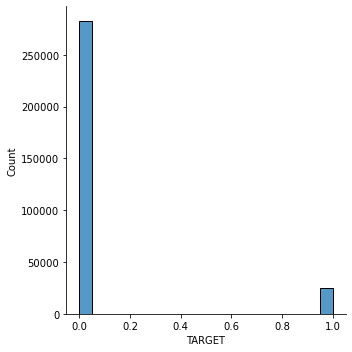

In [21]:
#  визначення збалансованості датасету для тренування
sns.displot(dataTrain['TARGET'])

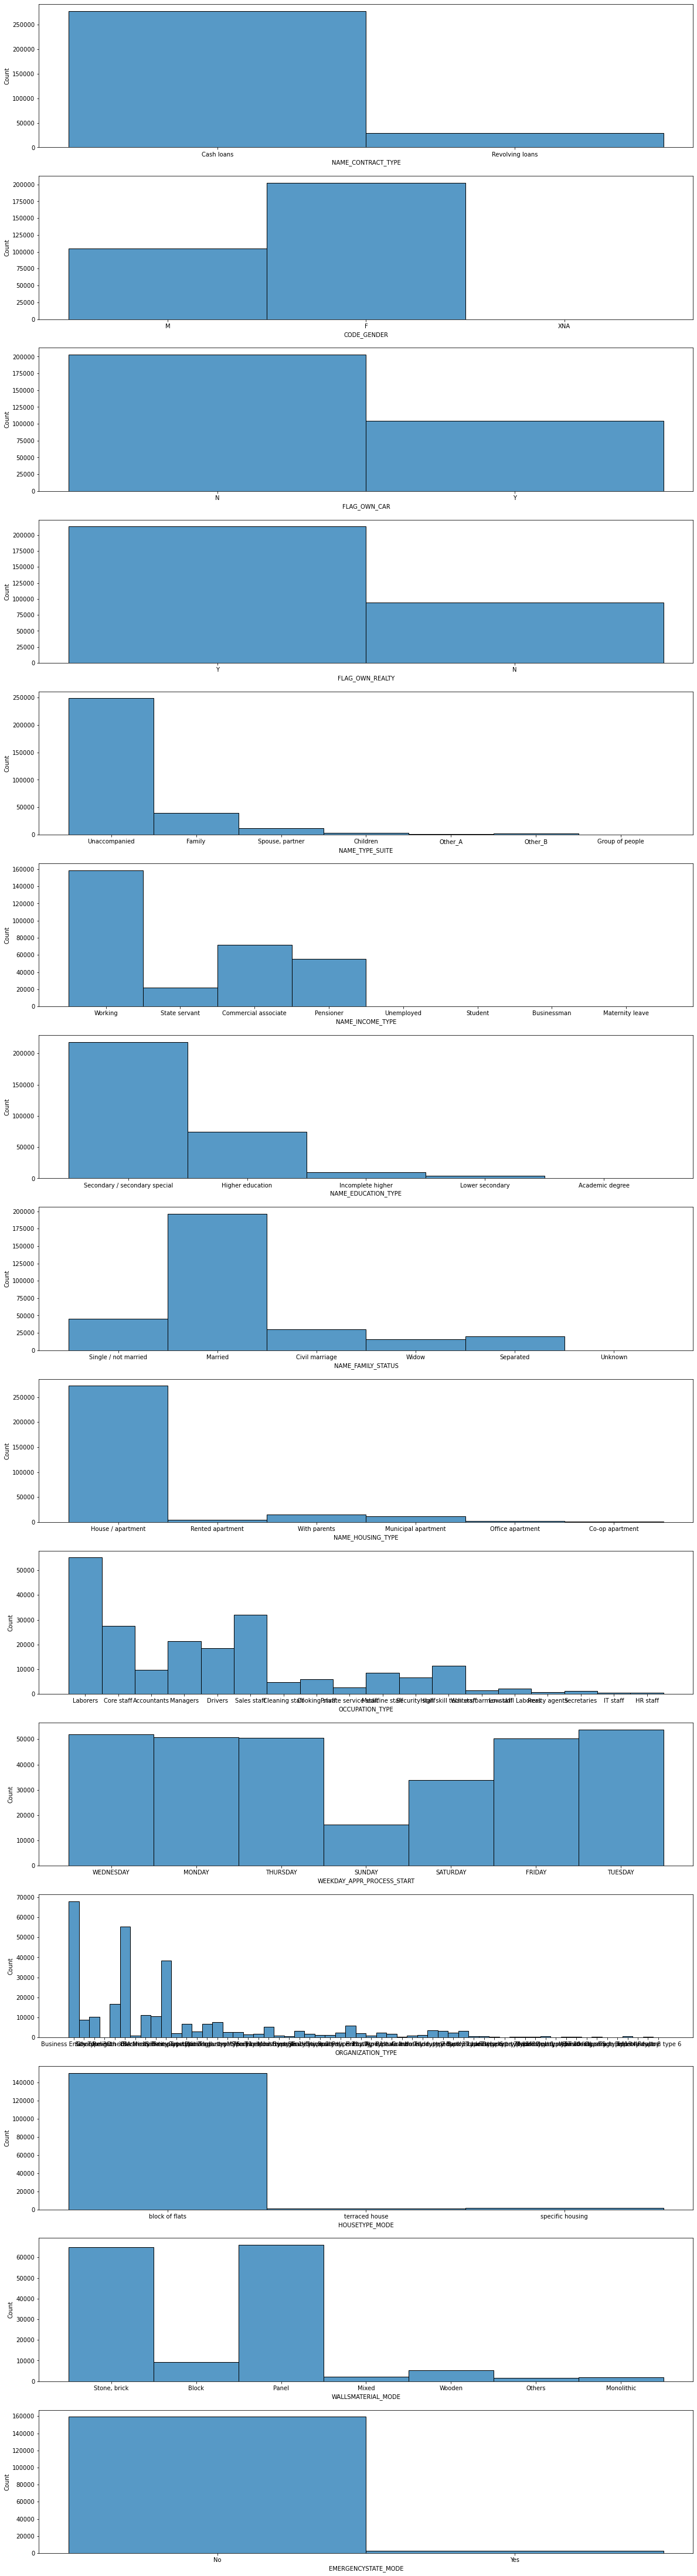

In [22]:
# Датасет не збалансований 
# Виведення розподілу категоріальних фіч в датасеті
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1)
fig.set_size_inches(20, 80)
for i, col in enumerate(categorical_features):
    sns.histplot(dataTrain[col], kde=False, ax=axes[i])
plt.show()

array([[<AxesSubplot:title={'center':'SK_ID_CURR'}>,
        <AxesSubplot:title={'center':'TARGET'}>,
        <AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>,
        <AxesSubplot:title={'center':'AMT_ANNUITY'}>,
        <AxesSubplot:title={'center':'AMT_GOODS_PRICE'}>,
        <AxesSubplot:title={'center':'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>],
       [<AxesSubplot:title={'center':'DAYS_EMPLOYED'}>,
        <AxesSubplot:title={'center':'DAYS_REGISTRATION'}>,
        <AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>,
        <AxesSubplot:title={'center':'FLAG_MOBIL'}>,
        <AxesSubplot:title={'center':'FLAG_EMP_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_WORK_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_CONT_MOBILE'}>,
        <AxesSubplot:title={'center':'FLAG_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG

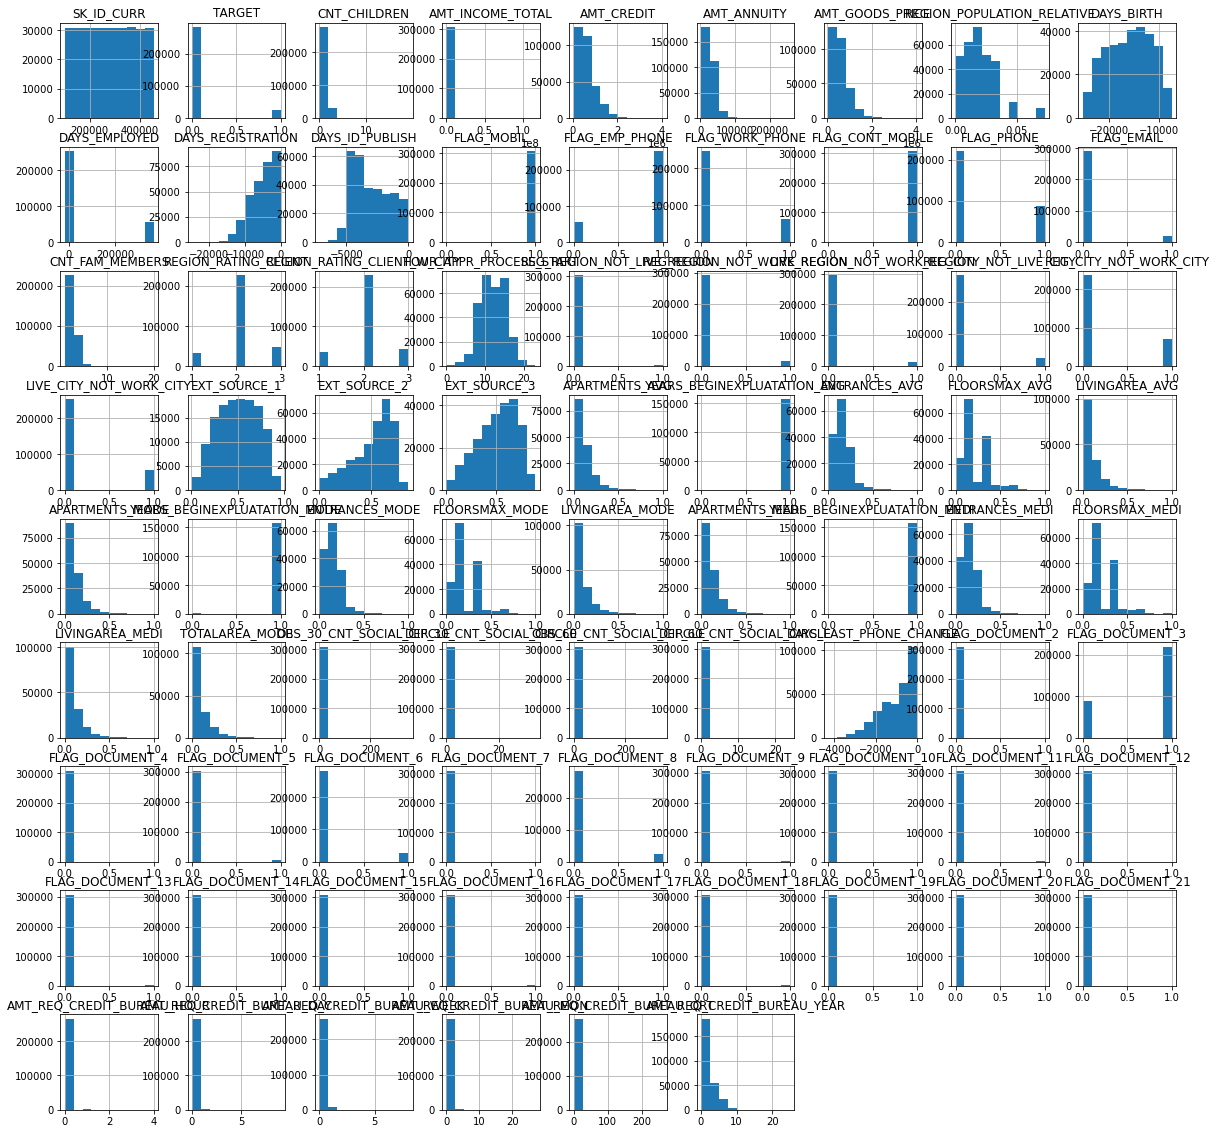

In [23]:
# візуалізація розподілу числових фіч
dataTrain[numerical_features].hist(figsize=(20,20))

C:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the f

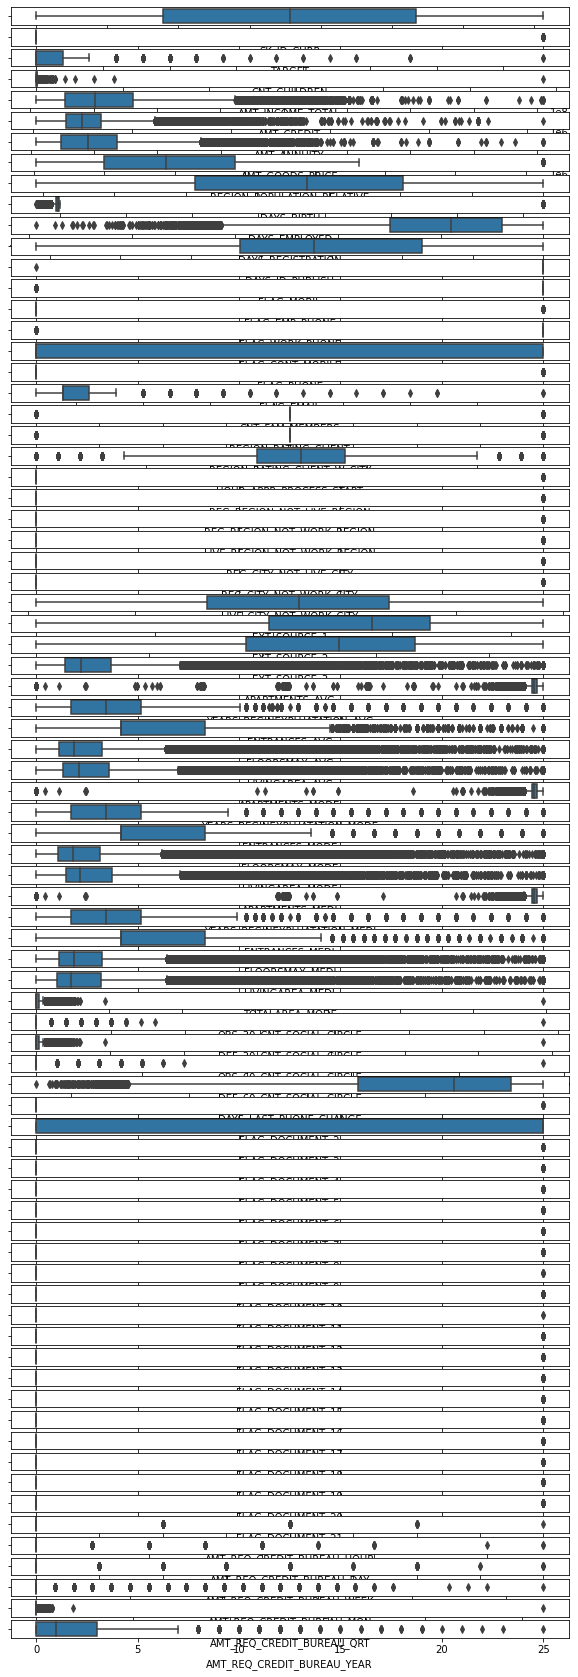

In [24]:
# виведення викидів в числових фічах
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1)
fig.set_size_inches(10, 30)
for i, col in enumerate(numerical_features):
    #axes[i].set_ylim([0, 10])
    sns.boxplot(dataTrain[col], ax=axes[i])
plt.show()

<AxesSubplot:>

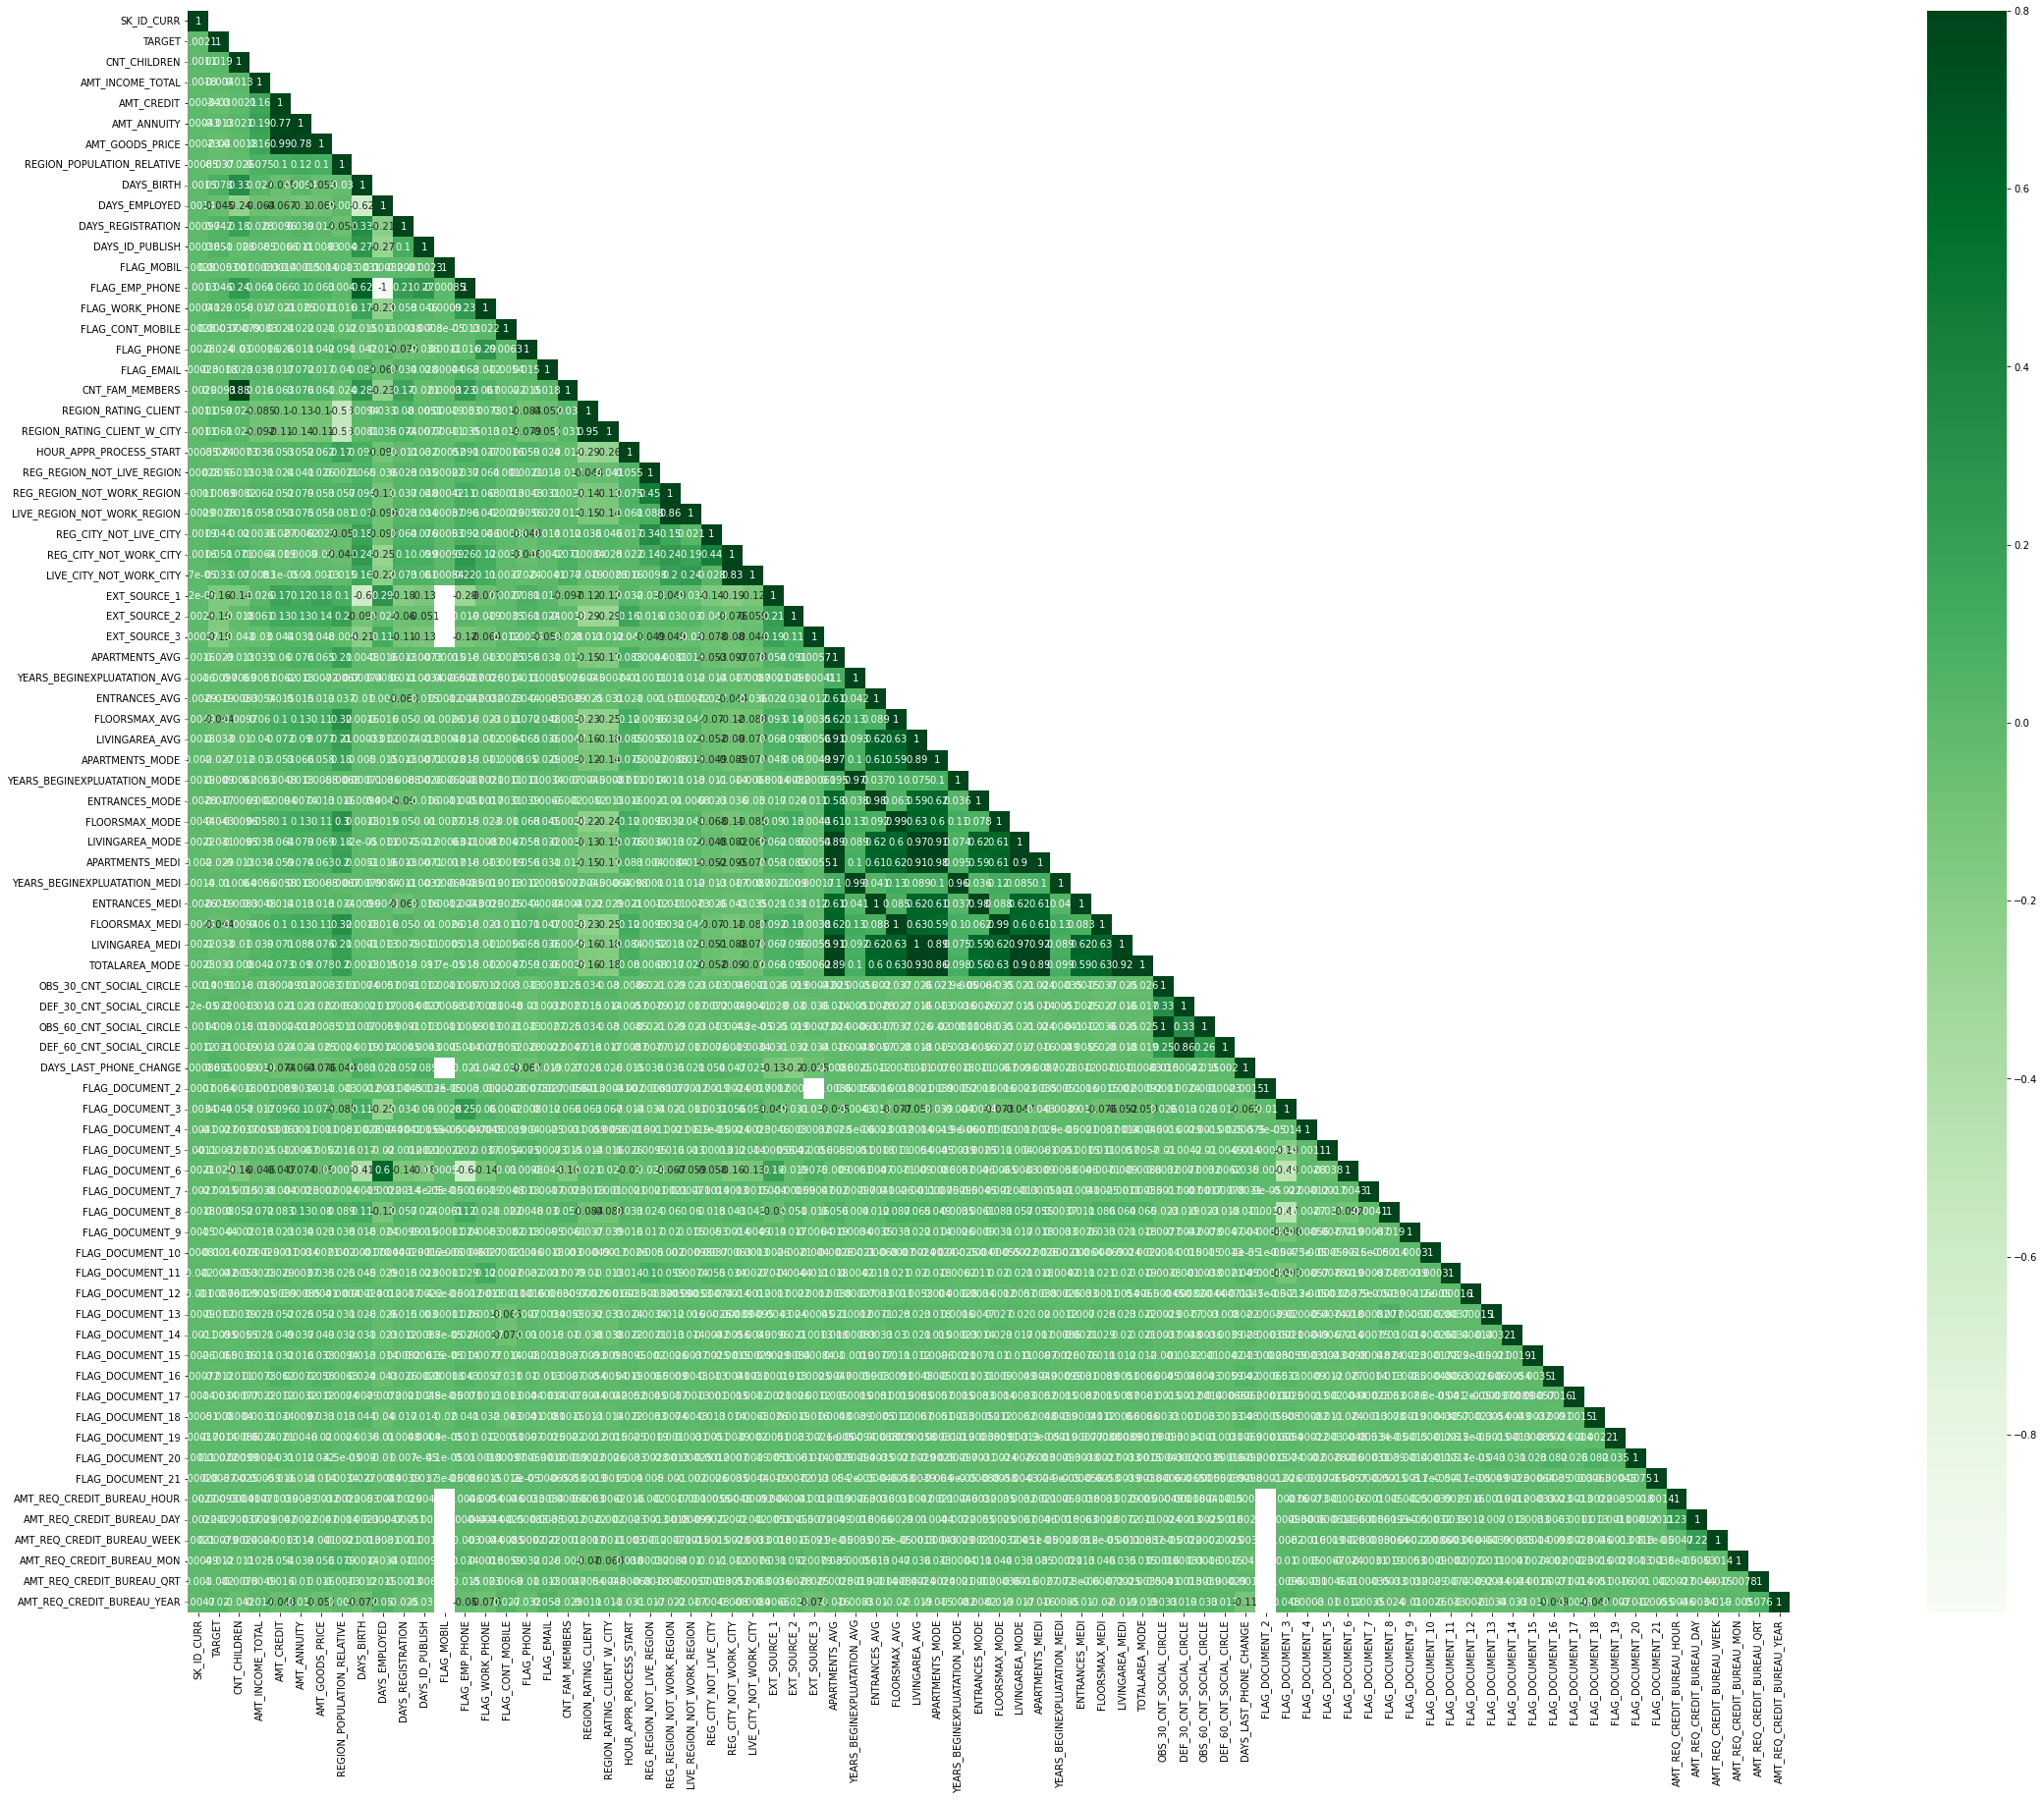

In [25]:
# виведення кореляції фіч у вигляді матриці
corrMatt = dataTrain.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(50,30)
sns.heatmap(corrMatt, cmap="Greens", mask=mask,vmax=.8, square=True,annot=True)

In [26]:
# Працює, але не оптимальний варіант для відбору
# Обчислення кореляційної матриці
# corr_matrix = dataTrain.corr().abs()

# # Вибір верхнього трикутника матриці
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# # Знаходження індексів колонок з кореляцією більше m
# m = 0.05
# to_drop = [column for column in upper.columns if any(upper[column] > m)]
# to_drop

In [54]:
train = dataTrain[['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_MOBIL',
                   'FLAG_WORK_PHONE','FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
                   'HOUR_APPR_PROCESS_START',
                   'REG_CITY_NOT_WORK_CITY',  
                   'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'
       ]]
#Train data
#Correctly classified:  0.579021820428604
#Validation ROC_AUC:  0.5940943533290675
#Validation
#Correctly classified:  0.5811423832983756
#Validation ROC_AUC:  0.598687298535392       

In [64]:
train = dataTrain[['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_MOBIL',
                   'FLAG_WORK_PHONE','FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
                   'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
                   'REG_CITY_NOT_WORK_CITY',  'REG_REGION_NOT_WORK_REGION',
                   'REGION_POPULATION_RELATIVE', 'AMT_CREDIT', 'DAYS_EMPLOYED',
                   'REG_CITY_NOT_LIVE_CITY','LIVE_CITY_NOT_WORK_CITY',
                   'FLAG_DOCUMENT_3',
                   'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 
                   'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
                   'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_TYPE_SUITE', 'WALLSMATERIAL_MODE', 
       'EMERGENCYSTATE_MODE'
       ]]
       #Train data
# Correctly classified:  0.6013219082306267
# Validation ROC_AUC:  0.6111194516446973
# #Validation
# Correctly classified:  0.5999869925044307
# Validation ROC_AUC:  0.6092920890253796

In [65]:
categorical_features

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [66]:
numerical_features

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'LIVINGAREA_AVG', 'APARTMENTS_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'LIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'ENTRANCES

In [67]:
# Заміна NaN на Uknown для категоріальних і на середнє для числових фіч (можна також на медіану)
dataTrainCopy = dataTrain.copy()
dataTestCopy = dataTest.copy()
for col in dataTrainCopy.columns:
    
    # Перевірка, чи є колонка категоріальною
    if dataTrainCopy[col].dtype == 'object':
        # Заміна NaN значень на нову категорію "Missing"
        dataTrainCopy[col] = dataTrainCopy[col].fillna(value='Missing')
    
    # Перевірка, чи є колонка числовою
    elif dataTrainCopy[col].dtype in ['int64', 'float64']:
        # Заміна NaN значень середнім значенням
        dataTrainCopy[col] = dataTrainCopy[col].fillna(dataTrainCopy[col].mean())

for col in dataTestCopy.columns:
    
    # Перевірка, чи є колонка категоріальною
    if dataTestCopy[col].dtype == 'object':
        # Заміна NaN значень на нову категорію "Missing"
        dataTestCopy[col] = dataTestCopy[col].fillna(value='Missing')
    
    # Перевірка, чи є колонка числовою
    elif dataTestCopy[col].dtype in ['int64', 'float64']:
        # Заміна NaN значень середнім значенням
        dataTestCopy[col] = dataTestCopy[col].fillna(dataTestCopy[col].mean())


In [68]:
#  перевірка відсутності NaN
nullTrainCopy = dataTrainCopy.isnull().sum()
print(nullTrainCopy.to_string())

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_

In [69]:
nullTestCopy = dataTestCopy.isnull().sum()
print(nullTestCopy.to_string())

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_

In [70]:
# Формування категоріальних і числових фіч для класифікації
columns = dataTrainCopy.columns
categorical = dataTrainCopy.select_dtypes(include=["object"]).columns
numerical = dataTrainCopy.select_dtypes(include=["float64", "int64"]).columns
print(columns)
print(categorical)
print(numerical)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'YE

In [71]:
# класифікація 
transformer = ColumnTransformer(
    transformers = [
        ("categorical", OneHotEncoder(), categorical),
        ("numerical", StandardScaler(), numerical.drop("TARGET"))
    ],
)

trainDataset = dataTrainCopy.drop("TARGET", axis=1)
fitTrainDataset = pd.DataFrame(transformer.fit_transform(trainDataset))
columnsForClassifying = columns.drop("TARGET")


testDataset = dataTestCopy[columnsForClassifying]
fitTestDataset = pd.DataFrame(transformer.transform(testDataset))
fitTestDataset

,0,1,2,3,4,5,6,7,8,9,...,208,209,210,211,212,213,214,215,216,217
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.082100,-0.067957,-0.180505,-0.313873,-0.359475,-1.092866
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.082100,-0.067957,-0.180505,-0.313873,-0.359475,0.632735
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.082100,-0.067957,-0.180505,-0.313873,0.994610,1.207935
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.082100,-0.067957,-0.180505,-0.313873,-0.359475,0.632735
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.055069,-0.050449,-0.165863,-0.302958,0.381078,0.048198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.082100,-0.067957,-0.180505,-0.313873,-0.359475,-0.517665
48740,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.055069,-0.050449,-0.165863,-0.302958,0.381078,0.048198
48741,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.082100,-0.067957,-0.180505,-0.313873,3.702780,-0.517665
48742,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.082100,-0.067957,-0.180505,-0.313873,-0.359475,0.057535


In [72]:
# вибірка Х ознак
trainX = fitTrainDataset
trainX

,0,1,2,3,4,5,6,7,8,9,...,208,209,210,211,212,213,214,215,216,217
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-0.090534,-0.024402,-0.022529,-0.018305,-8.210023e-02,-0.067957,-1.805048e-01,-0.313873,-3.594746e-01,-5.176655e-01
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-0.090534,-0.024402,-0.022529,-0.018305,-8.210023e-02,-0.067957,-1.805048e-01,-0.313873,-3.594746e-01,-1.092866e+00
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,-0.090534,-0.024402,-0.022529,-0.018305,-8.210023e-02,-0.067957,-1.805048e-01,-0.313873,-3.594746e-01,-1.092866e+00
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-0.090534,-0.024402,-0.022529,-0.018305,3.336720e-17,0.000000,-3.645032e-17,0.000000,-7.516682e-17,-3.831603e-16
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-0.090534,-0.024402,-0.022529,-0.018305,-8.210023e-02,-0.067957,-1.805048e-01,-0.313873,-3.594746e-01,-1.092866e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-0.090534,-0.024402,-0.022529,-0.018305,3.336720e-17,0.000000,-3.645032e-17,0.000000,-7.516682e-17,-3.831603e-16
307507,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-0.090534,-0.024402,-0.022529,-0.018305,3.336720e-17,0.000000,-3.645032e-17,0.000000,-7.516682e-17,-3.831603e-16
307508,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-0.090534,-0.024402,-0.022529,-0.018305,1.274116e+01,-0.067957,-1.805048e-01,0.859944,-3.594746e-01,-5.176655e-01
307509,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-0.090534,-0.024402,-0.022529,-0.018305,-8.210023e-02,-0.067957,-1.805048e-01,-0.313873,-3.594746e-01,-1.092866e+00


In [73]:
# цільова ознака
trainY = train['TARGET']
trainY

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [74]:
#  розбивання датасету на тренувальну 80 % і валідаційну  20 % частини
train_x, test_x, train_y, test_y = train_test_split(trainX, trainY, test_size=0.2)
print(f"Train: {train_x.shape}, {train_y.shape}")
print(f"Test: {test_x.shape}, {test_y.shape}")

Train: (246008, 218), (246008,)
Test: (61503, 218), (61503,)


In [75]:
# тренування логістичною регресією
classifyingModel = LogisticRegression(class_weight = "balanced", max_iter=2000)
classifyingModel.fit(train_x, train_y)
predictionTrain = classifyingModel.predict(train_x)
validate = classifyingModel.predict(test_x)

print("\tTrain data")
print("Correctly classified: ", accuracy_score(train_y, predictionTrain))
print("Validation ROC_AUC: ", roc_auc_score(train_y, predictionTrain))

print("\tValidation")
print("Correctly classified: ", accuracy_score(test_y, validate))
print("Validation ROC_AUC: ", roc_auc_score(test_y, validate))

	Train data
Correctly classified:  0.6889003609638711
Validation ROC_AUC:  0.6850933508800101
	Validation
Correctly classified:  0.6916735768986879
Validation ROC_AUC:  0.6816134435339716


In [76]:
# тренування деревом рішень
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, train_y)
predictionTrainTree = clf.predict(train_x)
validateTree = clf.predict(test_x)

print("\tTrain data")
print("Correctly classified: ", accuracy_score(train_y, predictionTrainTree))
print("Validation ROC_AUC: ", roc_auc_score(train_y, predictionTrainTree))

print("\tValidation")
print("Correctly classified: ", accuracy_score(test_y, validateTree))
print("Validation ROC_AUC: ", roc_auc_score(test_y, validateTree))

	Train data
Correctly classified:  1.0
Validation ROC_AUC:  1.0
	Validation
Correctly classified:  0.8529990406972018
Validation ROC_AUC:  0.5401695467497302


In [81]:
# запишемо в файл для здачі
validateSubmision = classifyingModel.predict(fitTestDataset)
submission_df = pd.read_csv("sample_submission.csv")
submission_df["TARGET"] = validateSubmision
submission_df.to_csv("submission.csv", index=False)

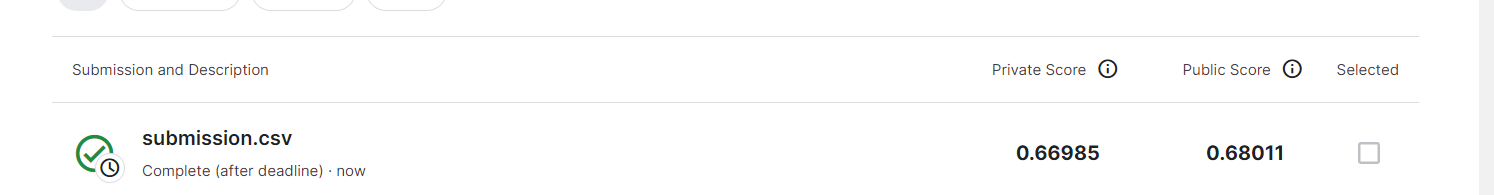